In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# MovieLens part 1
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
user_id               100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_code              100000 non-null object
movie_id              100000 non-null int64
rating                100000 non-null int64
unix_timestamp        100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


In [40]:
#评论最多的25部电影
lens.groupby('title').size().sort_values(ascending=False)[:25]

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [55]:
movie_stats = lens.groupby('title').agg({'rating':[np.size, np.mean]})
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

In [57]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

Text(0.5,0,'count of users')

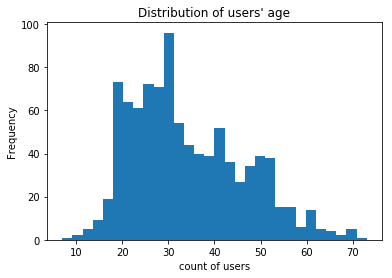

In [60]:
#观影年龄分布情况
users['age'].plot.hist(bins=30)
plt.title('Distribution of users\' age')
plt.xlabel('age')
plt.xlabel('count of users')

In [66]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age-group'] = pd.cut(lens['age'], range(0, 81, 10), right=False, labels=labels)

In [79]:
lens.groupby('age-group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age-group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [80]:
lens.set_index('movie_id', inplace=True)

In [94]:
by_age = lens.loc[most_50.index].groupby(['title', 'age-group'])
by_age['rating'].mean().unstack().fillna(0)[:10]

age-group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Back to the Future (1985),0.0,4.037037,3.720588,3.915789,4.036364,3.500000,3.857143,4.000000
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.000000
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.000000
Contact (1997),5.0,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000


In [99]:
lens.reset_index('movie_id', inplace=True)

In [101]:
#男与女分歧最大的电影
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                          columns=['sex'],
                          values='rating',
                          fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [102]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.reset_index('movie_id', inplace=True)
pivoted.head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


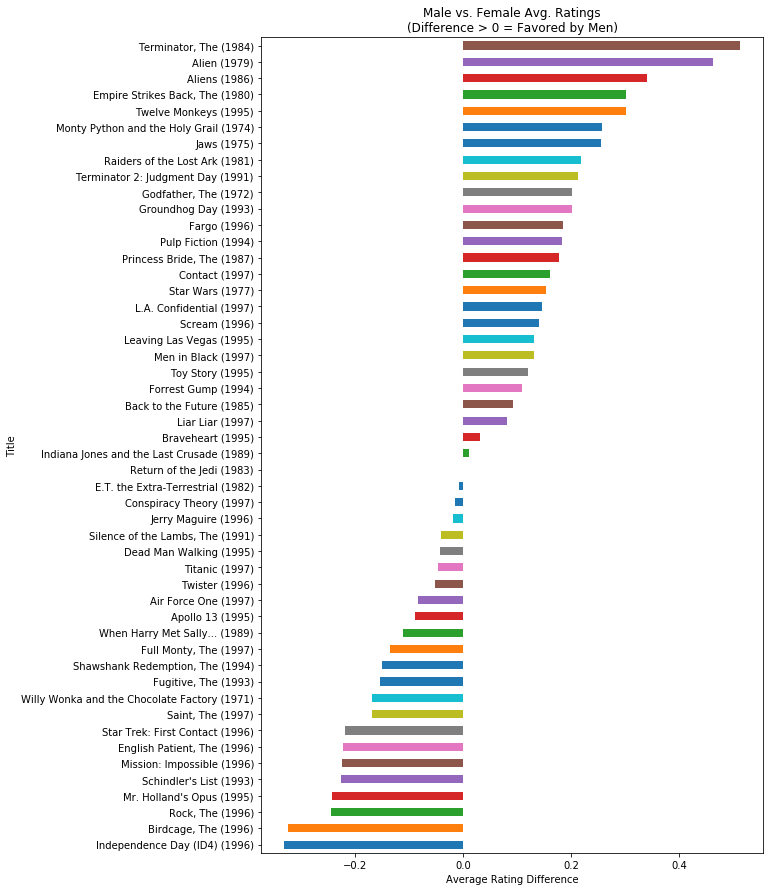

In [105]:
disagreements = pivoted[pivoted['movie_id'].isin(most_50.index)]['diff'].sort_values()
disagreements.plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [110]:
# MovieLens part 2
m_u_cols = ['user_id', 'gender', 'age', 'occupation', 'zip']
m_users = pd.read_table('data/ml-1m/users.dat', sep='::', names=m_u_cols, engine='python')

m_r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', names=m_r_cols, engine='python')

m_m_cols = ['movie_id', 'title', 'genres']
m_movies = pd.read_table('data/ml-1m/movies.dat', sep='::', names=m_m_cols, engine='python')

data = pd.merge(pd.merge(m_users, m_ratings), m_movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [111]:
#http://blog.csdn.net/royecode/article/details/51533101

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
